## I- Packages

In [74]:
import numpy as np
import pandas as pd

import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Text Preprocessing
from sklearn.feature_extraction.text import CountVectorizer

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import wordcloud

%matplotlib inline

## II- Data

In [39]:
data_01 = pd.read_csv('./data/spam.csv', encoding='latin-1')
data_02 = pd.read_csv('./data/lingSpam.csv',encoding='latin-1')
data_03 = pd.read_csv('./data/completeSpamAssassin.csv',encoding='latin-1')
data_04 = pd.read_csv('./data/enronSpamSubset.csv',encoding='latin-1')

In [40]:
print(data_01.columns)
print(data_02.columns)
print(data_03.columns)	
print(data_04.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')
Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Body', 'Label'], dtype='object')


In [41]:
data_01.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data_02.drop(["Unnamed: 0"], axis=1, inplace=True)
data_03.drop(["Unnamed: 0"], axis=1, inplace=True)
data_04.drop(['Unnamed: 0.1', 'Unnamed: 0',], axis=1, inplace=True)
print(data_01.columns)
print(data_02.columns)
print(data_03.columns)	
print(data_04.columns)

Index(['v1', 'v2'], dtype='object')
Index(['Body', 'Label'], dtype='object')
Index(['Body', 'Label'], dtype='object')
Index(['Body', 'Label'], dtype='object')


In [42]:
data_01["v1"].replace('ham', 0, inplace=True)
data_01["v1"].replace('spam', 1, inplace=True)

In [43]:
X_df = pd.concat([data_01["v2"], data_02["Body"], data_03["Body"], data_04["Body"]])
y_df = pd.concat([data_01["v1"], data_02["Label"], data_03["Label"], data_04["Label"]])
all_data_df = pd.concat([X_df, y_df],keys=["txt","lable"],axis=1)

X_df.head(),y_df.head()

(0    Go until jurong point, crazy.. Available only ...
 1                        Ok lar... Joking wif u oni...
 2    Free entry in 2 a wkly comp to win FA Cup fina...
 3    U dun say so early hor... U c already then say...
 4    Nah I don't think he goes to usf, he lives aro...
 dtype: object,
 0    0
 1    0
 2    1
 3    0
 4    0
 dtype: int64)

In [44]:
all_data_df

,txt,lable
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,Subject: missing bloomberg deals\n stephanie -...,0
9997,Subject: eops salary survey questionnaire\n we...,0
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0


In [45]:
X = X_df.values
y = y_df.values

X.shape, y.shape

((24223,), (24223,))

In [65]:
subject = all_data_df["txt"].values
subject.shape

(24223,)

## III- Data Preprocessing

### III.1 Tokenization

In [67]:
tokenized_subject = []
for i in range(len(subject)):
    print(i)
    tokenized_subject.append(word_tokenize(str(subject[i])))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### III.2 lowercasing

In [78]:
tokenized_subject2 = []
ln = len(tokenized_subject)

for i in range(ln):
    phrase = []
    print(i*100/ln, "%")
    for word in tokenized_subject[i]:
        phrase.append(word.lower())
    tokenized_subject2.append(phrase)
    
print(tokenized_subject2[:5])
print(len(tokenized_subject2))

0.0 %
0.0041283078066300626 %
0.008256615613260125 %
0.012384923419890188 %
0.01651323122652025 %
0.020641539033150313 %
0.024769846839780375 %
0.028898154646410438 %
0.0330264624530405 %
0.03715477025967056 %
0.041283078066300626 %
0.045411385872930685 %
0.04953969367956075 %
0.05366800148619081 %
0.057796309292820876 %
0.061924617099450935 %
0.066052924906081 %
0.07018123271271105 %
0.07430954051934112 %
0.07843784832597119 %
0.08256615613260125 %
0.0866944639392313 %
0.09082277174586137 %
0.09495107955249144 %
0.0990793873591215 %
0.10320769516575155 %
0.10733600297238162 %
0.11146431077901169 %
0.11559261858564175 %
0.1197209263922718 %
0.12384923419890187 %
0.12797754200553194 %
0.132105849812162 %
0.13623415761879207 %
0.1403624654254221 %
0.14449077323205217 %
0.14861908103868224 %
0.1527473888453123 %
0.15687569665194237 %
0.16100400445857244 %
0.1651323122652025 %
0.16926062007183257 %
0.1733889278784626 %
0.17751723568509267 %
0.18164554349172274 %
0.1857738512983528 %
0.1899

### III.3 Removing stopwords

In [79]:
stp_word = set(stopwords.words('english') + ['subject'])

tokenized_subject3 = []
ln = len(tokenized_subject2)

for i in range(ln):
    print(i*100/ln, "%")
    phrase = []
    for word in tokenized_subject2[i]:
        if word not in stp_word:
            phrase.append(word)
    tokenized_subject3.append(phrase)



0.0 %
0.0041283078066300626 %
0.008256615613260125 %
0.012384923419890188 %
0.01651323122652025 %
0.020641539033150313 %
0.024769846839780375 %
0.028898154646410438 %
0.0330264624530405 %
0.03715477025967056 %
0.041283078066300626 %
0.045411385872930685 %
0.04953969367956075 %
0.05366800148619081 %
0.057796309292820876 %
0.061924617099450935 %
0.066052924906081 %
0.07018123271271105 %
0.07430954051934112 %
0.07843784832597119 %
0.08256615613260125 %
0.0866944639392313 %
0.09082277174586137 %
0.09495107955249144 %
0.0990793873591215 %
0.10320769516575155 %
0.10733600297238162 %
0.11146431077901169 %
0.11559261858564175 %
0.1197209263922718 %
0.12384923419890187 %
0.12797754200553194 %
0.132105849812162 %
0.13623415761879207 %
0.1403624654254221 %
0.14449077323205217 %
0.14861908103868224 %
0.1527473888453123 %
0.15687569665194237 %
0.16100400445857244 %
0.1651323122652025 %
0.16926062007183257 %
0.1733889278784626 %
0.17751723568509267 %
0.18164554349172274 %
0.1857738512983528 %
0.1899

### III-4. removing punctuation

In [80]:
tokenized_subject4 = []

for i in range(len(tokenized_subject3)):
    phrase = []
    for word in tokenized_subject3[i]:
        if word.isalpha():
            phrase.append(word)
    tokenized_subject4.append(phrase)
    
print(tokenized_subject4[:5])

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply'], ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'], ['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']]


### III-5. stemming

In [81]:
stemmer = PorterStemmer()

tokenized_subject5 = []

for i in range(len(tokenized_subject4)):
    phrase = []
    for word in tokenized_subject4[i]:
        phrase.append(stemmer.stem(word))
    tokenized_subject5.append(phrase)
    
print(tokenized_subject5[0])

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']


### III-6. Vectorization

In [117]:
vectorizer = CountVectorizer(min_df=0.0008)
fit_vec = vectorizer.fit([' '.join(words) for words in tokenized_subject5])

In [118]:
words = fit_vec.get_feature_names_out()

In [119]:
tran_vec = fit_vec.transform([' '.join(words) for words in tokenized_subject5])

In [120]:
words_matrix = tran_vec.toarray()
words_matrix.shape

(24223, 8054)

In [122]:
vec_data = pd.DataFrame(words_matrix, columns=words)

In [124]:
vec_data.describe()

,aa,aaa,aaron,ab,abacha,abandon,abbrevi,abc,abdomin,abel,...,zone,zonedubai,zoom,zu,zum,zur,zurich,zyban,zzzz,ìï
count,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,...,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000
mean,0.010238,0.006234,0.002312,0.014697,0.002560,0.006192,0.003468,0.002188,0.000826,0.002353,...,0.011972,0.001775,0.001775,0.005862,0.003014,0.006770,0.002560,0.002229,0.001321,0.002188
std,0.381507,0.598558,0.135675,0.899104,0.101967,0.176559,0.313310,0.143802,0.028723,0.097628,...,0.211405,0.042096,0.086426,0.412382,0.239103,0.689126,0.221636,0.051354,0.045415,0.049305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.000000,90.000000,20.000000,122.000000,8.000000,22.000000,48.000000,20.000000,1.000000,10.000000,...,22.000000,1.000000,8.000000,60.000000,36.000000,106.000000,34.000000,2.000000,3.000000,2.000000


## IV- vesualization

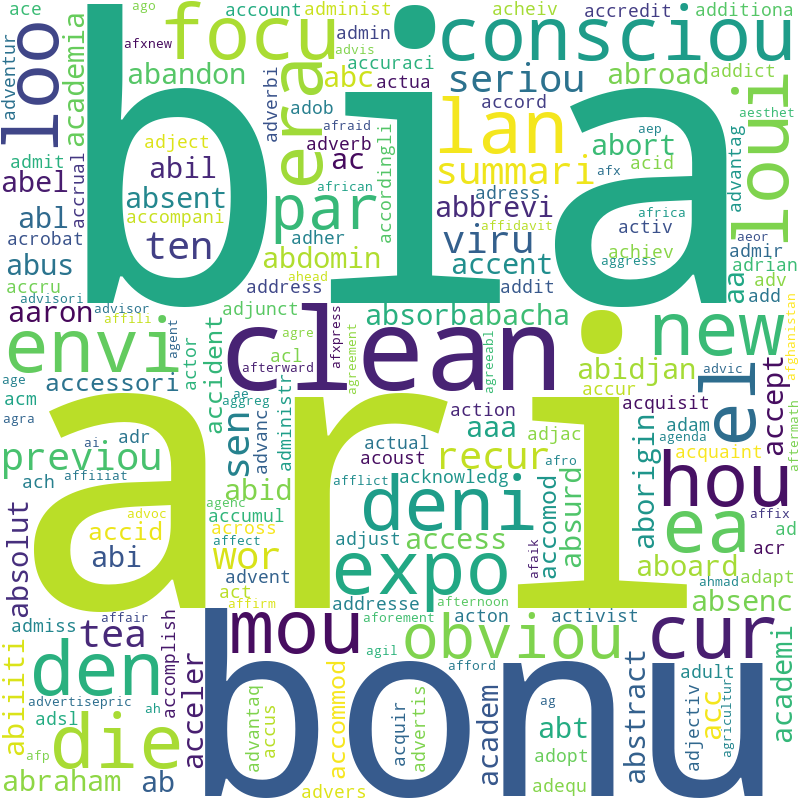

In [136]:
word_cloud = wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(words))
word_cloud.to_image()

In [126]:
cnt = 0
spam_words = []
ham_words = []

for i in range(len(tokenized_subject5)):
    if y[i] == 1:
        spam_words.append(tokenized_subject5[cnt])
    else:
        ham_words.append(tokenized_subject5[cnt])
                

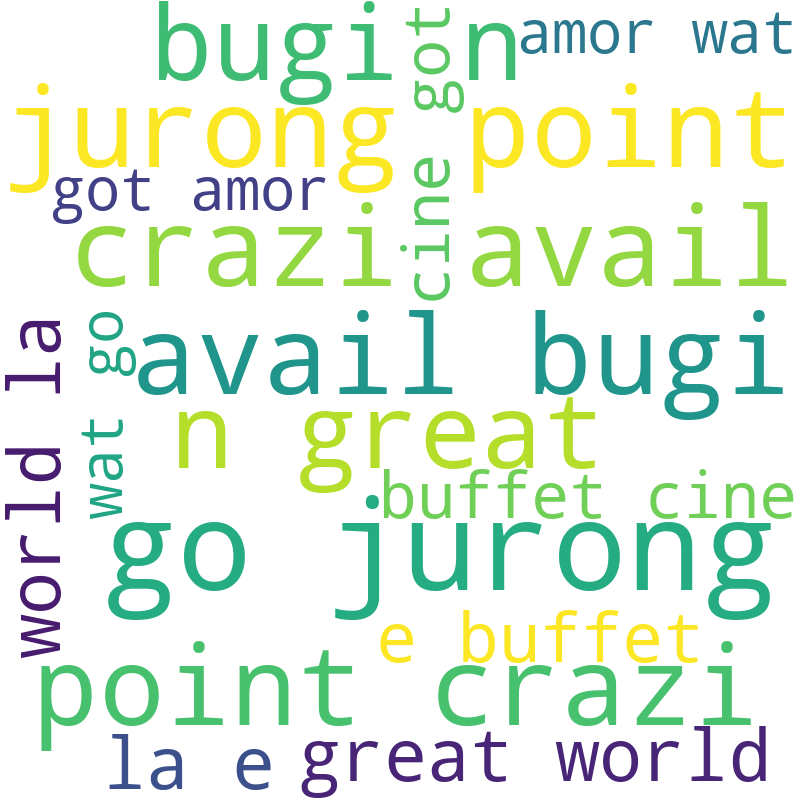

In [128]:
word_cloud2 = wordcloud.WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(' '.join([' '.join(words) for words in spam_words]))
word_cloud2.to_image()

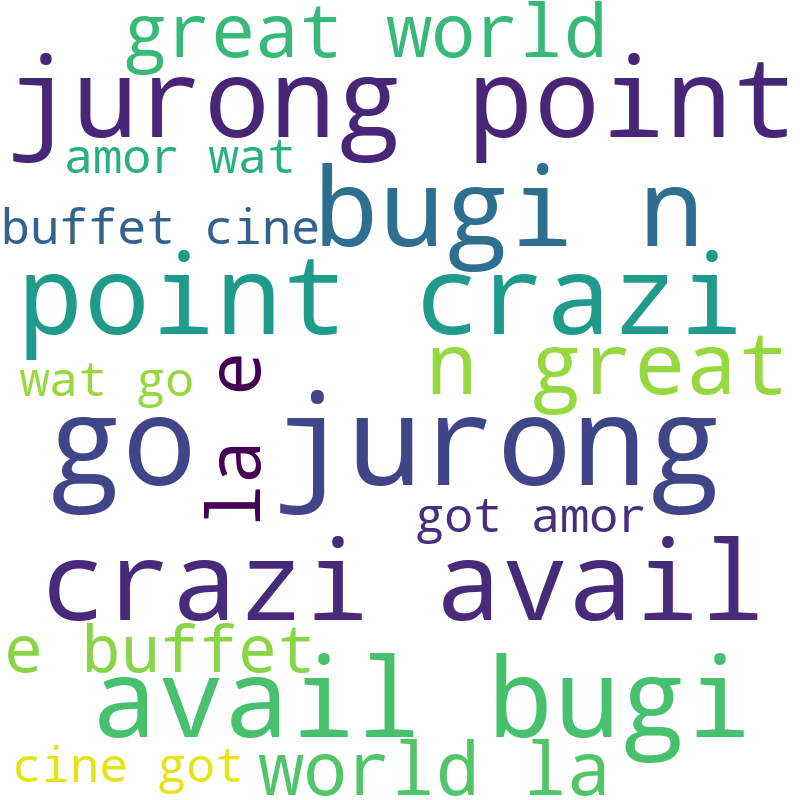

In [138]:
word_cloud2 = wordcloud.WordCloud(width=800, height=800, background_color='white', stopwords=None,min_font_size=1).generate(' '.join([' '.join(words) for words in ham_words]))
word_cloud2.to_image()

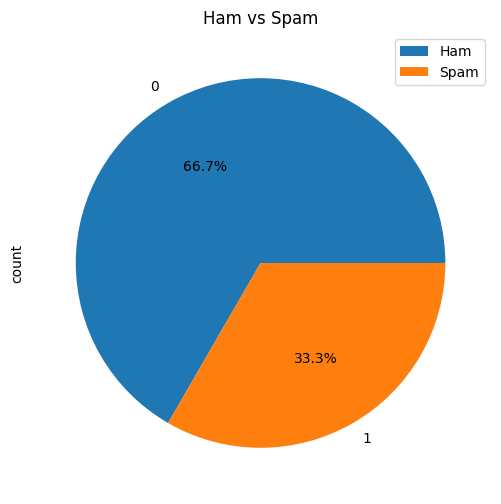

In [134]:
# pi chart of ham vs spam
plt.figure(figsize=(10, 6))
y_df.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Ham vs Spam')
plt.legend(["Ham", "Spam"])
plt.show()

## V- Splitting the data

In [141]:
X_train, X_test, y_train, y_test = train_test_split(words_matrix, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19378, 8054) (4845, 8054) (19378,) (4845,)


## VI- Model

In [191]:
X_search = X_train[:1000]
y_search = y_train[:1000]


(19378, 8054)

In [313]:
model2 = LogisticRegression(tol=0.001,C=1,fit_intercept=True,penalty='l2',max_iter=100,random_state=42)

model2.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42, tol=0.001)

In [314]:
Accuracy:  0.9537667698658411

y_pred2 = model2.predict(X_test)
print("\033[92mAccuracy:\033[0m ", accuracy_score(y_test, y_pred2))
print("\033[91mClassification Report:\033[0m \n", classification_report(y_test, y_pred2))

Accuracy:  0.9560371517027864
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3243
           1       0.94      0.93      0.93      1602

    accuracy                           0.96      4845
   macro avg       0.95      0.95      0.95      4845
weighted avg       0.96      0.96      0.96      4845



In [325]:
y_pred_all = model2.predict(words_matrix)
len_all =  len(y_pred_all)
span_number = len

24223

Text(0.5, 2.5, 'Model Accuracy: 95.6%')

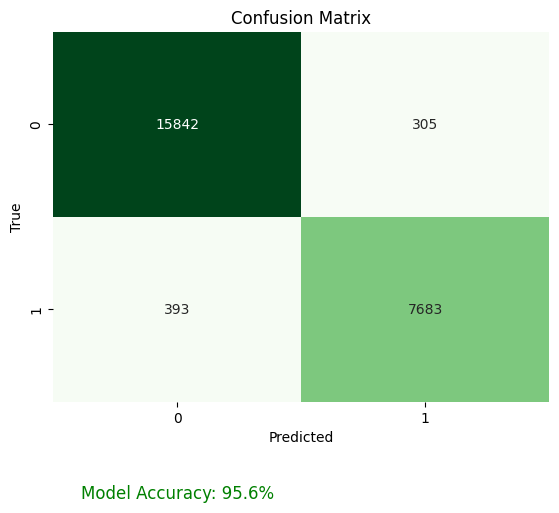

In [346]:
mtx = confusion_matrix(y, y_pred_all)
sns.heatmap(mtx, annot=True,fmt="d",cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.text(0.5, 2.5, 'Model Accuracy: 95.6%', ha='center', va='center', color='green', fontsize=12)

## VII- Find the best paramiters

In [275]:

param_grid = {
    # tested par
}



In [281]:
import joblib

search = GridSearchCV(model2, param_grid, n_jobs=-1, cv=3)
# Replace search.fit(X_train, y_train) with the following code
with joblib.parallel_backend('threading'):
    search.fit(X_search, y_search)

print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'max_iter': 9}


# VIII- Export the model

In [347]:
import pickle

with open('./model/spam_filter_LR.pkl', 'wb') as file:
    pickle.dump(model2, file)
